In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ts_data = pd.read_csv(r"D:\Malathi\EDA\AirPassengers.csv")

In [12]:
ts_data['Month'] = pd.to_datetime(ts_data['Month'])

In [13]:
ts_data = ts_data.set_index(['Month'])

In [14]:
ts_data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


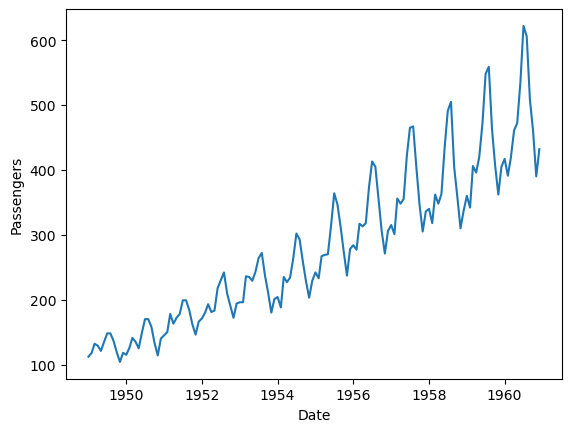

In [15]:
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(ts_data)

# Stationarity check - rolling statistics

In [16]:
roll_mean = ts_data.rolling(window = 12).mean()
#window = 12 beacuse no. of months = 12 i.e., monthwise
roll_std = ts_data.rolling(window = 12).std()

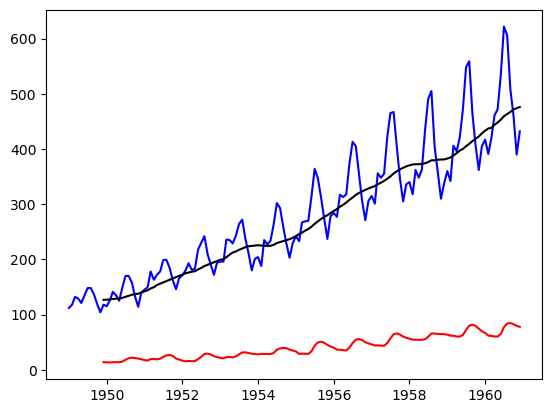

In [17]:
plt.plot(ts_data, c = 'blue')
plt.plot(roll_mean, c ='black')
plt.plot(roll_std, c = 'red')

# ADF test

In [18]:
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(ts_data['#Passengers'])
print(adftest)

(0.8153688792060508, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [19]:
#0.991880243437641, should be less than 0.05 for the data to be stationary

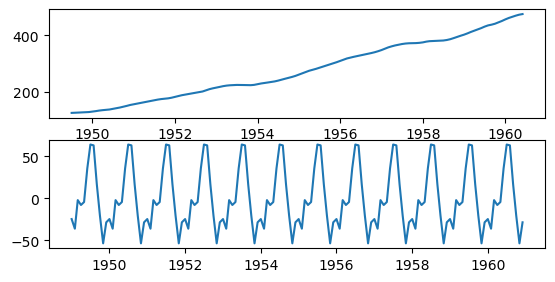

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_data)

trend = decompose.trend
seasonal = decompose.seasonal

plt.subplot(311)
plt.plot(trend)
plt.subplot(312)
plt.plot(seasonal)

# converting non-stationary data to a stationary data

In [21]:
ts_data_new = ts_data['#Passengers'] - ts_data['#Passengers'].shift(2) #successive differences
ts_data_new

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Name: #Passengers, Length: 144, dtype: float64

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 8

In [22]:
adfuller(ts_data_new.dropna())

(-2.9616951355554195,
 0.038629757676988855,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 985.7309222414162)

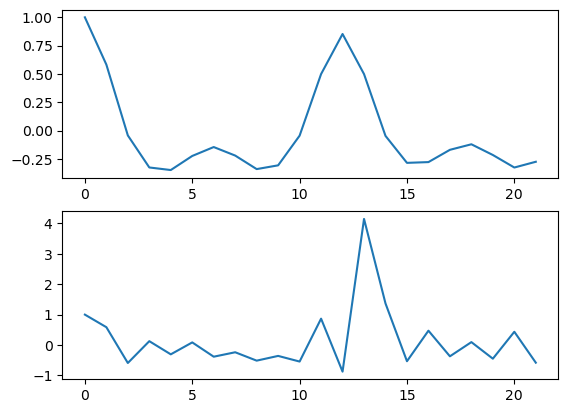

In [23]:
from statsmodels.tsa.stattools import acf, pacf
d_acf = acf(ts_data_new.dropna())
d_pacf = pacf(ts_data_new.dropna())

plt.subplot(211)
plt.plot(d_acf)
plt.subplot(212)
plt.plot(d_pacf)

#in graph 1
#the first time it reaches zero on the y axis... what is the value of x there.... that value is the p value
#here p = 2


#in graph 2
#p = 1 or 2 from graph

In [24]:
ts_data_new.dropna(inplace = True)

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_data, order=(2, 2, 1), seasonal_order = (2, 2, 1, 12)) 
#order = (p, q, t) p is from acf plot q is from pacf plot and t is shift
# without giving the seasonal order the prediction plot will be a straight ascending line i,e., just the trend
model_fit = model.fit()

C:\Users\vinod\miniconda3\envs\mini\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vinod\miniconda3\envs\mini\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vinod\miniconda3\envs\mini\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vinod\miniconda3\envs\mini\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [26]:
res = model_fit.forecast(24) #forecast for the next 12 months


In [27]:
res = pd.DataFrame(res)
res.columns = ['#Passengers']

ts_data_final = pd.DataFrame(ts_data)
ts_data_pred = ts_data_final.append(res)

C:\Users\vinod\AppData\Local\Temp\ipykernel_29168\1729196090.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ts_data_pred = ts_data_final.append(res)


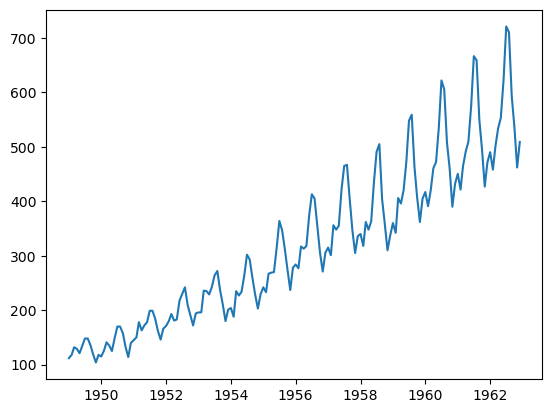

In [28]:
plt.plot(ts_data_pred)

In [1]:
import seaborn 

In [4]:
seaborn.pairplot(ts_data,hue='#Passengers')

ValueError: No variables found for grid columns.